In [ ]:
#Bibliografia
#https://unipython.com/curso-de-procesamiento-de-textos-gensim/

In [2]:
#!pip install --upgrade gensim #tuve que instalar la libreria

  Running setup.py bdist_wheel for smart-open: started
  Running setup.py bdist_wheel for smart-open: finished with status 'done'
  Stored in directory: C:\Users\Armando\AppData\Local\pip\Cache\wheels\27\65\38\8d7f5fe8d7afb4e4566587b2d1933cec185fba19257836c943
  Running setup.py bdist_wheel for boto3: started
  Running setup.py bdist_wheel for boto3: finished with status 'done'
  Stored in directory: C:\Users\Armando\AppData\Local\pip\Cache\wheels\dc\be\26\b8eb33efc648c5a8bc96c8e2fca8a2ff5327fc00289c3ff9ef
Successfully built smart-open boto3
  Found existing installation: six 1.10.0
    Uninstalling six-1.10.0:
      Successfully uninstalled six-1.10.0
  Found existing installation: Cython 0.25.2
    Uninstalling Cython-0.25.2:
      Successfully uninstalled Cython-0.25.2
  Found existing installation: idna 2.2
    Uninstalling idna-2.2:
      Successfully uninstalled idna-2.2
  Found existing installation: chardet 2.3.0
    Uninstalling chardet-2.3.0:
      Successfully uninstalled ch

    DEPRECATION: Uninstalling a distutils installed project (six) has been deprecated and will be removed in a future version. This is due to the fact that uninstalling a distutils project will only partially uninstall the project.
    DEPRECATION: Uninstalling a distutils installed project (boto) has been deprecated and will be removed in a future version. This is due to the fact that uninstalling a distutils project will only partially uninstall the project.
    DEPRECATION: Uninstalling a distutils installed project (docutils) has been deprecated and will be removed in a future version. This is due to the fact that uninstalling a distutils project will only partially uninstall the project.
You are using pip version 9.0.1, however version 20.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [4]:
from gensim.models import Word2Vec

In [5]:
from gensim.models.keyedvectors import KeyedVectors

In [6]:
modelo = KeyedVectors.load_word2vec_format("./sbw_vectors.bin", binary=True)

Te muestra la palabra correspondiente al vector más cercano a la suma del vector “ron” más el vector “cola”. Del mismo modo podemos encontrar la palabra más cercana al resultado de gato-maullar+ladrar:

In [7]:
modelo.most_similar(positive=["ron","cola"],topn=1)

[('cubalibre', 0.6797232031822205)]

Y podemos encontrar qué palabra se parece menos de una lista:

In [36]:
palabras=["perro","coche","gato","zorro","caballo"]
modelo.doesnt_match(palabras)

C:\Users\Armando\Anaconda3\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'coche'

In [42]:
print(modelo.doesnt_match(["Colombia","Ecuador","China","Venezuela"]))

China


C:\Users\Armando\Anaconda3\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


Aparte de esas operaciones, puedes probar algunos otros ejemplos, como el clásico:

In [33]:
modelo.most_similar(positive=["rey","mujer"],negative=["hombre"],topn=1)

[('reina', 0.7493030428886414)]

Buscar un Sinónimo

In [38]:
modelo.most_similar("granjero")

[('granja', 0.6619080305099487),
 ('pastor', 0.6282102465629578),
 ('granjeros', 0.61934494972229),
 ('trampero', 0.6180711388587952),
 ('agricultor', 0.6167852282524109),
 ('Blomefield', 0.6157280802726746),
 ('Gwenda', 0.6151532530784607),
 ('Marondera', 0.6090083122253418),
 ('Culann', 0.60781329870224),
 ('Cralle', 0.604280412197113)]

obtener el grado de semejanza entre dos palabras:

In [39]:
modelo.similarity("hombre","mujer")

0.7174485

Si quieres obtener el vector correspondiente a una palabra:

In [43]:
gato_vector=modelo.word_vec("gato")

maullar_vector=modelo.word_vec("maullar")

ladrar_vector=modelo.word_vec("ladrar")


De modo que, una forma alternativa de resolver la operación “gato-maullar+ladrar” sería:

In [46]:
modelo.similar_by_vector(gato_vector-maullar_vector+ladrar_vector)

[('ladrar', 0.8310680389404297),
 ('gato', 0.80445796251297),
 ('perro', 0.7121046781539917),
 ('perros', 0.623246967792511),
 ('zorro', 0.6150989532470703),
 ('ladrido', 0.6039999723434448),
 ('gatos', 0.5864946842193604),
 ('maúlla', 0.5764097571372986),
 ('montés', 0.5755391716957092),
 ('hurón', 0.5747962594032288)]

In [45]:
modelo.most_similar(positive=["gato","ladrar"],negative=["maullar"],topn=1)

[('perro', 0.6373056173324585)]

Por último, un par de comentarios sobre el modelo SBWCE:

Parece haber sido entrenado teniendo con palabras acentuadas, así como mayúsculas y minúsculas. De modo que la palabra “Lápiz” dará distintos resultados que “lápiz” o “lapiz”.
Si estás usando Python 2, puede que tengas problemas al usar palabras con tilde, por ejemplo:

In [48]:
modelo.most_similar("lápiz")

[('bolígrafo', 0.7448678612709045),
 ('pincel', 0.7313501834869385),
 ('crayón', 0.7308675646781921),
 ('lápices', 0.7281906604766846),
 ('carboncillo', 0.7155462503433228),
 ('rotulador', 0.7153562307357788),
 ('estilógrafo', 0.7055243253707886),
 ('lapicero', 0.7034063339233398),
 ('plumilla', 0.6892597079277039),
 ('entintar', 0.6882398724555969)]

In [49]:
modelo.most_similar("lapiz")

[('contornee', 0.7759906649589539),
 ('borroneado', 0.7684885263442993),
 ('rizador', 0.7603975534439087),
 ('estilógrafo', 0.7498780488967896),
 ('difumino', 0.7460038065910339),
 ('gouche', 0.7427493333816528),
 ('eyeliner', 0.7397847771644592),
 ('birome', 0.7378357648849487),
 ('Contornee', 0.7318902611732483),
 ('ruleros', 0.7317335605621338)]

In [83]:
print(modelo['computadora'])

[-0.1167961   0.14855266 -0.02306766  0.33350793  0.07680331  0.15218842
 -0.25780448  0.29820657  0.01361906  0.18128258  0.05431674  0.01496018
  0.10211679 -0.588864    0.04891421 -0.23186952  0.11977372  0.20348847
 -0.05473102  0.15693393 -0.19556426  0.00113607 -0.03361124  0.138281
  0.05227958  0.21984103  0.04653235  0.17662181  0.29078287 -0.01581275
  0.39221647 -0.04519518  0.25148714  0.28255054  0.09881563 -0.24058168
 -0.0604603   0.05152753 -0.161154   -0.17175344  0.24296434  0.13818789
  0.10730977 -0.12790844  0.03082096 -0.23310429  0.04874342  0.03887862
  0.01384178 -0.16715574 -0.00372468 -0.08551936  0.37598637  0.32791692
 -0.12392151 -0.03287379 -0.17583844 -0.08253603  0.12736066  0.25980896
 -0.19903798  0.00845056 -0.05868404 -0.28797048 -0.33093628  0.36301246
 -0.15757723  0.19281414 -0.20413585  0.16580905  0.07865175 -0.30907673
 -0.11949452  0.2957564  -0.16498165  0.44878665 -0.11532086  0.13569199
  0.11554101 -0.16821127  0.03543042 -0.15977517 -0.0

con una sola palabra

In [56]:
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE

In [75]:
def display_closestwords_tsnescatterplot(modelo, word):
    
    arr = np.empty((0,300), dtype='f')
    word_labels = [word]

    # get close words
    close_words = modelo.similar_by_word(word)
    

    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([modelo[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = modelo[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

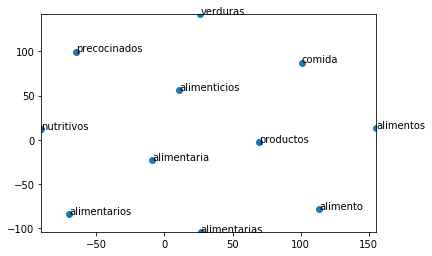

In [76]:
display_closestwords_tsnescatterplot(modelo,'alimentos')

In [90]:
from sklearn.decomposition import PCA #Grab PCA functions

In [163]:
listado=["manzana","pera","fresa","mandarina","auto","cabra","perico","coche","automovil"]
pala=modelo[listado]
print(pala)

[[ 0.16856     0.11906052 -0.02751338 ...  0.29533735  0.21079825
   0.05968495]
 [ 0.08520026 -0.03410327 -0.16523191 ...  0.03365397  0.10491783
   0.21899226]
 [ 0.09852193  0.2907289  -0.12885109 ...  0.05276096  0.5136821
  -0.0290894 ]
 ...
 [ 0.01627187  0.07527017 -0.05590526 ... -0.43227488 -0.09132934
   0.40572512]
 [-0.12078531 -0.19789737 -0.27196273 ... -0.18663022 -0.20842281
   0.17777221]
 [ 0.01049928 -0.0782245  -0.2585719  ... -0.15084435 -0.0348958
   0.28121254]]


In [164]:
# fit a 2d PCA model to the vectors
X = pala
pca = PCA(n_components=2)
result = pca.fit_transform(X)

In [165]:
result

array([[-0.97463036, -0.9563973 ],
       [-1.6997247 , -0.6616557 ],
       [-1.587108  , -0.7527106 ],
       [-1.755997  , -0.98148775],
       [ 2.492784  , -0.2963051 ],
       [-0.98894715,  0.6697058 ],
       [-0.37479183,  3.8510637 ],
       [ 2.4464664 , -0.1569927 ],
       [ 2.4419498 , -0.71522045]], dtype=float32)

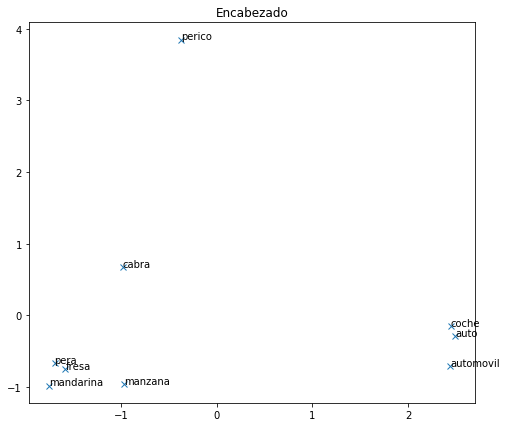

In [173]:

# create a plot of the projection
fig, ax = plt.subplots()
fig.set_size_inches(8, 7)
ax.plot(result[:, 0], result[:, 1], 'x')
ax.set_title('Encabezado'),

words = list(listado)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0],result[i, 1]))


plt.show()

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXx

In [13]:
print('RAZONAMIENTO ANALÓGICO')
print('¿Cómo se le dice a una mujer que es rey?')
print(modelo.most_similar(positive=["mujer","rey"],negative=["hombre"]))

RAZONAMIENTO ANALÓGICO
¿Cómo se le dice a una mujer que es rey?
[('reina', 0.7493030428886414), ('consorte', 0.7034263610839844), ('princesa', 0.6861541867256165), ('Olofsdotter', 0.6481985449790955), ('reyes', 0.6391464471817017), ('Eriksdotter', 0.6360353231430054), ('regente', 0.6339377164840698), ('Gunhilda', 0.6317264437675476), ('Rasoherina', 0.6298272013664246), ('Danmartín', 0.6269059777259827)]


In [11]:
print(modelo.most_similar(positive=["mujer","rey"],negative=["hombre"]))

[('reina', 0.7493030428886414), ('consorte', 0.7034263610839844), ('princesa', 0.6861541867256165), ('Olofsdotter', 0.6481985449790955), ('reyes', 0.6391464471817017), ('Eriksdotter', 0.6360353231430054), ('regente', 0.6339377164840698), ('Gunhilda', 0.6317264437675476), ('Rasoherina', 0.6298272013664246), ('Danmartín', 0.6269059777259827)]


In [14]:
modelo.most_similar(positive=["gato","ladrar"],negative=["maullar"],topn=1)

[('perro', 0.6373056173324585)]

In [17]:
print('RAZONAMIENTO COMPOSICIONAL')
print("¿Qué usas con una chaqueta en Argentina?")
print(modelo.most_similar(positive=["chaqueta","argentina"]))
print("¿Qué es lo más parecido en Bogotá a un metro?")
print(modelo.most_similar(positive=["bogotá","metro"]))

RAZONAMIENTO COMPOSICIONAL
¿Qué usas con una chaqueta en Argentina?
[('corbata', 0.6549950242042542), ('camisa', 0.6472713947296143), ('descotada', 0.6375879645347595), ('blusa', 0.6306939721107483), ('abotonada', 0.6287420392036438), ('esmóquin', 0.6270449757575989), ('poncho', 0.6226142644882202), ('gabardina', 0.6225605010986328), ('parpusa', 0.6215286254882812), ('polera', 0.6205595135688782)]
¿Qué es lo más parecido en Bogotá a un metro?
[('Masmo', 0.7711561322212219), ('Ploshcha', 0.7675820589065552), ('Beekkant', 0.7511922717094421), ('viajeron', 0.7508050203323364), ('términi', 0.7473353743553162), ('Colarse', 0.7467913031578064), ('Bellvedere', 0.7427597045898438), ('discurria', 0.7397221922874451), ('Transversala', 0.7391642332077026), ('Krasnosélskaya', 0.7389208078384399)]


In [19]:
print("saborear")
print(modelo.most_similar(positive=["sabor","sabe","saborear"]))

saborear
[('degustara', 0.7071782350540161), ('saboreará', 0.7027115225791931), ('picosito', 0.7024193406105042), ('paladear', 0.7016551494598389), ('degustándose', 0.6999034285545349), ('cebadina', 0.6933169960975647), ('degustador', 0.6904380321502686), ('saborearse', 0.6898754835128784), ('Chelada', 0.6898494958877563), ('chamoyadas', 0.6895954608917236)]


In [24]:
#EVALUACION DE LA SIMILITUD
print("¿Colombia se parece más a Ecuador o a Corea?")
print(modelo.similarity("Colombia","Ecuador"))
#print("Colombia vs. Ecuador 0.83329847705")
print(modelo.similarity("Colombia","Corea"))
#print("Colombia vs. Corea 0.559571022858")

¿Colombia se parece más a Ecuador o a Corea?
0.79119897
0.41635123
